In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Data I/O

In [2]:
#ASKAP
file_path_hydra_askap = "gausspyplus/ASKAP/decomposition_hydra/gpy_decomposed/spectra_hydra_g+_fit_fin_finalized.dat"
file_path_norma_askap = "gausspyplus/ASKAP/decomposition_norma/gpy_decomposed/spectra_norma_g+_fit_fin_finalized.dat"

#ATCA

file_path_hydra4k1_atca = "gausspyplus/ATCA/decomposition_hydra4k1/gpy_decomposed/spectra_4k1_g+_fit_fin_finalized.dat"
file_path_hydra4k2_atca = "gausspyplus/ATCA/decomposition_hydra4k2/gpy_decomposed/spectra_4k2_g+_fit_fin_finalized.dat"
file_path_hydra10001_atca = "gausspyplus/ATCA/decomposition_hydraV210001/gpy_decomposed/spectra_v2-10001_g+_fit_fin_finalized.dat"
file_path_hydra10002_atca = "gausspyplus/ATCA/decomposition_hydraV210002/gpy_decomposed/spectra_v2-10002_g+_fit_fin_finalized.dat"
#file_path_hydra1500_atca = "gausspyplus/ATCA/decomposition_hydraV21500/gpy_decomposed/spectra_v2-1500_g+_fit_fin_finalized.dat"

file_path_norma4k_atca= "gausspyplus/ATCA/decomposition_norma4k/gpy_decomposed/spectra_4k_g+_fit_fin_finalized.dat"
#file_path_norma1000_atca = "gausspyplus/ATCA/decomposition_normaV21000/gpy_decomposed/spectra_v2-1000_g+_fit_fin_finalized.dat"
file_path_norma1500_atca = "gausspyplus/ATCA/decomposition_normaV21500/gpy_decomposed/spectra_v2-1500_g+_fit_fin_finalized.dat"


In [3]:
# Read the data from the file into a DataFrame
df_hydra_askap = pd.read_csv(file_path_hydra_askap, delim_whitespace=True)
df_norma_askap = pd.read_csv(file_path_norma_askap, delim_whitespace=True)


df_hydra4k1_atca = pd.read_csv(file_path_hydra4k1_atca, delim_whitespace=True)
df_hydra4k2_atca = pd.read_csv(file_path_hydra4k2_atca, delim_whitespace=True)
df_h10001_atca = pd.read_csv(file_path_hydra10001_atca, delim_whitespace=True)
df_h10002_atca = pd.read_csv(file_path_hydra10002_atca, delim_whitespace=True)
#df_h1500_atca = pd.read_csv(file_path_hydra1500_atca, delim_whitespace=True)

df_norma4k_atca = pd.read_csv(file_path_norma4k_atca, delim_whitespace=True)
#df_n1000_atca = pd.read_csv(file_path_norma1000_atca, delim_whitespace=True)
df_n1500_atca = pd.read_csv(file_path_norma1500_atca, delim_whitespace=True)


## Data manipulation

In [4]:
print('ASKAP - Hydra - number of spectral signals: ',len(df_hydra_askap))
print('ASKAP - Normal - number of spectral signals: ',len(df_norma_askap))

print('ATCA - Hydra - number of spectral signals v=4: ',len(df_hydra4k1_atca))
print('ATCA - Hydra - number of spectral signals v=4: ',len(df_hydra4k2_atca))
print('ATCA - Hydra - number of spectral signals v=0.2: ',len(df_h10001_atca))
print('ATCA - Hydra - number of spectral signals v=0.2: ',len(df_h10002_atca))
#print('ATCA - Hydra - number of spectral signals v=0.2: ',len(df_h1500_atca))

print('ATCA - Norma - number of spectral signals v=4: ',len(df_norma4k_atca))
#print('ATCA - Norma - number of spectral signals v=0.2: ',len(df_n1000_atca))
print('ATCA - Norma - number of spectral signals v=0.2: ',len(df_n1500_atca))

ASKAP - Hydra - number of spectral signals:  59
ASKAP - Normal - number of spectral signals:  404
ATCA - Hydra - number of spectral signals v=4:  19
ATCA - Hydra - number of spectral signals v=4:  3
ATCA - Hydra - number of spectral signals v=0.2:  16
ATCA - Hydra - number of spectral signals v=0.2:  8
ATCA - Norma - number of spectral signals v=4:  56
ATCA - Norma - number of spectral signals v=0.2:  41


In [5]:
df_hydra4k_atca = pd. concat([df_hydra4k1_atca, df_hydra4k2_atca], axis = 0, ignore_index = True)
df_hydraV2_atca = pd.concat([df_h10001_atca, df_h10002_atca], axis = 0, ignore_index = True)
df_normaV2_atca = pd.concat([df_n1500_atca], axis = 0, ignore_index = True)

In [6]:
df_hydra_askap.head()

,x_pos,y_pos,RA,DEC,amp,e_amp,VLSR,e_VLSR,vel_disp,e_vel_disp,...,pvalue,aicc,rchi2,ncomps,ncomp_wmedian,ncomp_jumps,flag_blended,flag_neg_res_peak,flag_broad,flag_centroid
0,0,0,1.0,1.0,0.0539,0.0040,-2.1794,0.5532,4.9736,0.3853,...,0.0015,-475.4961,0.6316,2,1,0,0,0,0,0
1,0,0,1.0,1.0,0.0106,0.0021,-16.1112,3.8615,6.6888,2.9311,...,0.0015,-475.4961,0.6316,2,1,0,0,0,0,0
2,1,0,NaN,NaN,0.0403,0.0037,1.1654,0.5041,4.7391,0.5042,...,0.0355,-355.7784,1.6956,1,1,0,0,0,0,0
3,2,0,NaN,NaN,0.0179,0.0016,-0.6921,0.5389,5.0588,0.5389,...,0.0864,-524.4327,1.3717,2,1,0,0,0,0,0
4,2,0,NaN,NaN,0.0058,0.0018,-130.6398,1.5329,4.3098,1.5332,...,0.0864,-524.4327,1.3717,2,1,0,0,0,0,0


## Functions

In [7]:
import os
from astropy.io import fits
from astropy.wcs import WCS

def plot_noise_map(data_source, folder_name, filename):
    filepath = os.path.join(f'{data_source}',f'decomposition_{folder_name}', 'gpy_maps', f'{filename}_noise_map.fits')

    # Load the noise data and WCS information from the FITS file
    noise = fits.getdata(filepath)
    wcs = WCS(fits.getheader(filepath))

    # Create a figure with WCS projection
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(projection=wcs))

    # Plot the noise map
    img_noise = ax.imshow(noise, cmap='plasma_r', vmin=0.075, vmax=0.375)
    fig.colorbar(img_noise, ax=ax, extend='max')
    ax.set_title('Noise map')


    # Show the plot
    plt.show()


In [8]:
def plot_variables(title, target):
    data1 = np.concatenate([df_hydraV2_atca[target], df_hydra4k_atca[target]])
    data2 = np.concatenate([df_normaV2_atca[target], df_norma4k_atca[target]])
    
    # Create bins for both subplots
    bins1 = np.histogram_bin_edges(data1, bins='auto')
    bins2 = np.histogram_bin_edges(data2, bins='auto')
    
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Upper part, ASKAP title on left
    fig.text(-0.02, 0.75, 'ASKAP', fontsize=16, ha='left', rotation=90)
    
    # Plot histograms for ASKAP 0.2 km/s
    axes[0][0].hist(df_hydra_askap[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    axes[0][0].set_xlabel(title, fontsize=12)
    axes[0][0].set_ylabel('N', fontsize=12)
    axes[0][0].legend()
    
    # Plot histograms for ASKAP 4 km/s
    axes[0][1].hist(df_norma_askap[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='4km/s')
    axes[0][1].set_xlabel(title, fontsize=12)
    axes[0][1].set_ylabel('N', fontsize=12)
    axes[0][1].legend()
    
    # Lower part, ATCA title on left
    fig.text(-0.02, 0.25, 'ATCA', fontsize=16, ha='left', rotation=90)
    fig.text(0.30, 1.02, 'HYDRA', fontsize=16, ha='center')
    fig.text(0.75, 1.02, 'NORMA', fontsize=16, ha='center')
    
    # Plot histograms for ATCA 0.2 km/s
    axes[1][0].hist(df_hydraV2_atca[target], bins=bins1, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s')
    axes[1][0].hist(df_hydra4k_atca[target], bins=bins1, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][0].set_xlabel(title, fontsize=12)
    axes[1][0].set_ylabel('N', fontsize=12)
    axes[1][0].legend()
    
    # Plot histograms for ATCA 4 km/s
    axes[1][1].hist(df_normaV2_atca[target], bins=bins2, color='grey', edgecolor='black', hatch='//', alpha=0.5, label='0.2km/s')
    axes[1][1].hist(df_norma4k_atca[target], bins=bins2, color='blue', edgecolor='black', hatch='\\', alpha=0.2, label='4km/s')
    axes[1][1].set_xlabel(title, fontsize=12)
    axes[1][1].set_ylabel('N', fontsize=12)
    axes[1][1].legend()
    
    plt.tight_layout()
    plt.show()

## AMP

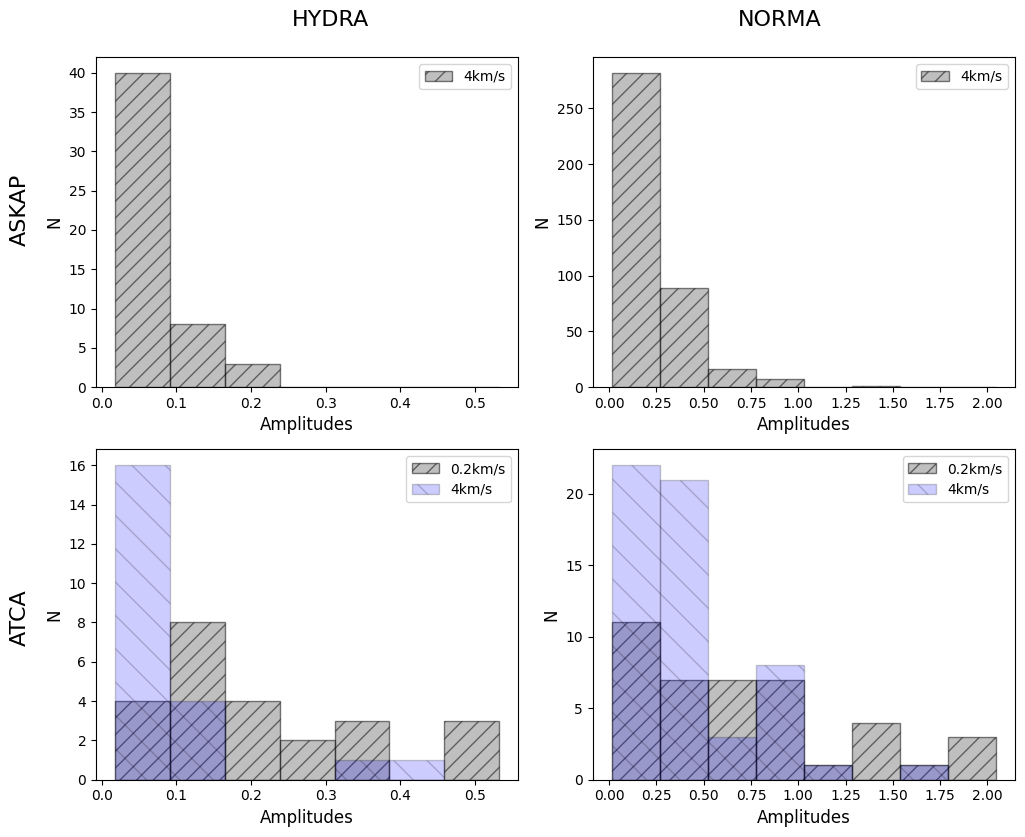

In [9]:
plot_variables('Amplitudes', 'amp')

## VLSR

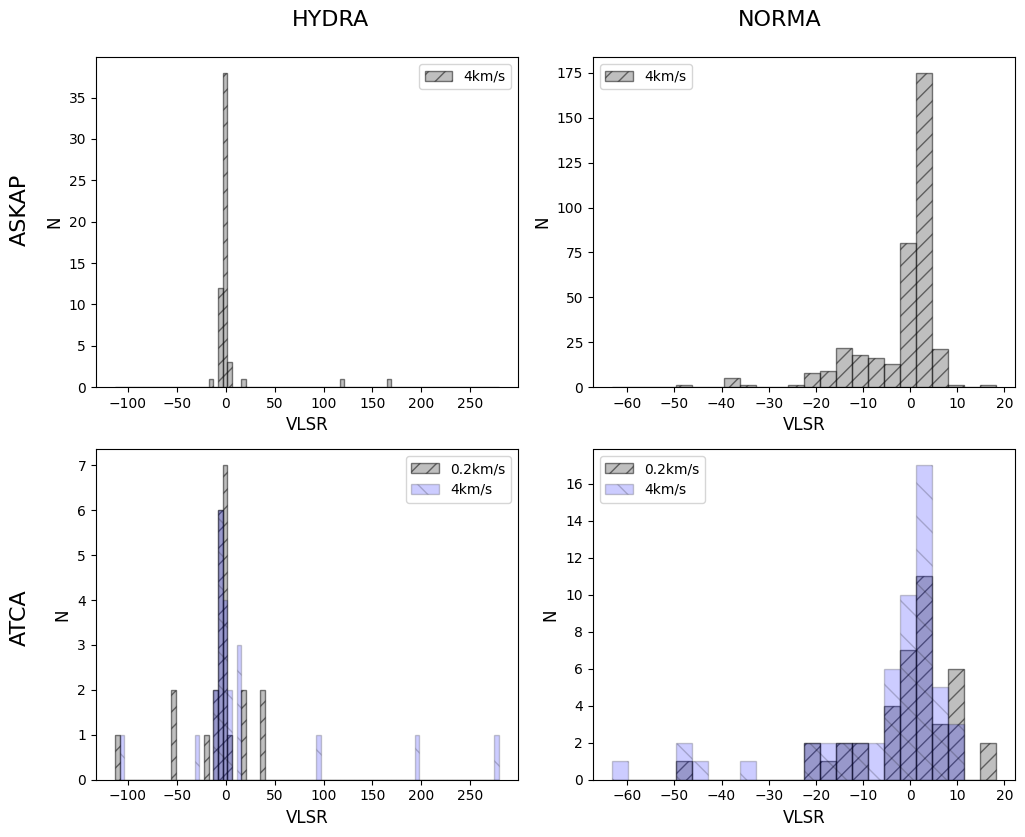

In [10]:
plot_variables('VLSR', 'VLSR')

## Total intensity

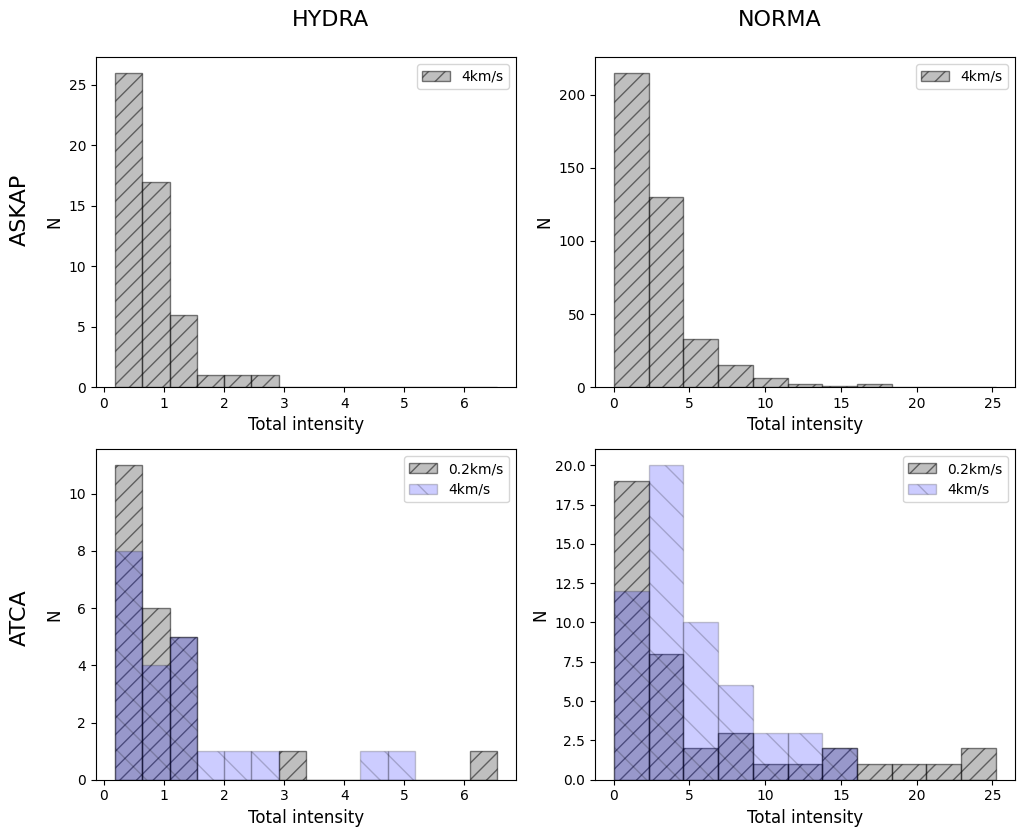

In [11]:
plot_variables('Total intensity', 'int_tot')

## Velocity dispersion

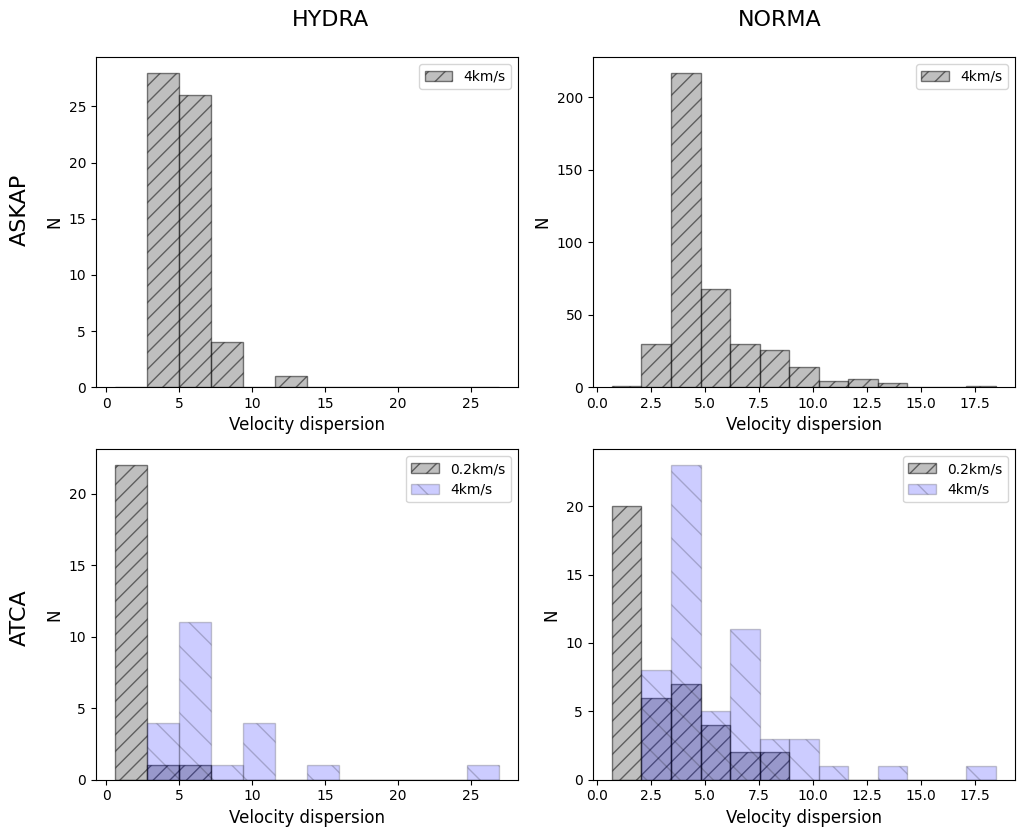

In [12]:
plot_variables('Velocity dispersion', 'vel_disp')